## Enron Outliers

In [1]:
import pickle
import sys
import matplotlib.pyplot
import numpy as np
import pandas as pd

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
features = ["salary", "bonus"]

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data = featureFormat(data_dict, features)

df = pd.DataFrame(data_dict)
df.loc['salary'] = df.loc['salary'].astype(float) 
#pd.to_numeric(df.loc['salary'], errors='coerce')
#df.loc['bonus'] = pd.to_numeric(df.loc['bonus'], errors='coerce')
#print df.loc['salary'].idxmax(axis=1)


In [2]:
df.loc['salary'].dtype

dtype('O')

In [3]:
enron_df = df.transpose()
enron_df.reset_index(inplace=True)
enron_df.rename(columns={'index':'name'}, inplace=True)
enron_df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
1,BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
2,BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
3,BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
4,BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [4]:
enron_df.loc[enron_df.bonus == 'NaN', 'bonus'] = np.NaN
enron_df.loc[enron_df.salary == 'NaN', 'salary'] = np.NaN

In [5]:
enron_df.bonus = enron_df.bonus.astype('float')
enron_df.salary = enron_df.salary.astype('float')
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
name                         146 non-null object
bonus                        82 non-null float64
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       95 non-null float64
shared_receip

In [6]:
enron_df.loc[enron_df.bonus.idxmax()]

name                               TOTAL
bonus                        9.73436e+07
deferral_payments               32083396
deferred_income                -27992891
director_fees                    1398517
email_address                        NaN
exercised_stock_options        311764000
expenses                         5235198
from_messages                        NaN
from_poi_to_this_person              NaN
from_this_person_to_poi              NaN
loan_advances                   83925000
long_term_incentive             48521928
other                           42667589
poi                                False
restricted_stock               130322299
restricted_stock_deferred       -7576788
salary                       2.67042e+07
shared_receipt_with_poi              NaN
to_messages                          NaN
total_payments                 309886585
total_stock_value              434509511
Name: 130, dtype: object

salary max 1111258.0
bonus max 8000000.0


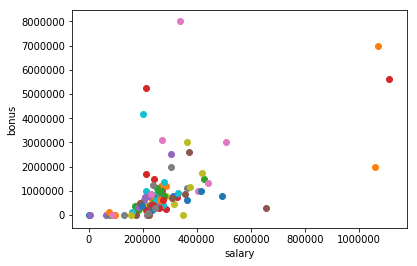

In [7]:
data_dict.pop( "TOTAL", 0 )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
### your code below

salaries, bonuses =  zip(*data)
print "salary max", np.max(salaries)
print "bonus max", np.max(bonuses)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [8]:
enron_df.sort_values(by=['bonus','salary'],ascending=False)#[['name','salary','bonus']]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
130,TOTAL,97343619.0,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229.0,NaN,NaN,309886585,434509511
78,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995,49537,2585,528,...,2035380,1552,False,1008149,NaN,339288.0,3962,7259,10425757,5167144
79,LAY KENNETH L,7000000.0,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,...,3600000,10359729,True,14761694,NaN,1072321.0,2411,4273,103559793,49110078
122,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000,29336,108,88,...,1920000,22122,True,6843672,NaN,1111258.0,2042,3627,8682716,26093672
7,BELDEN TIMOTHY N,5249999.0,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,...,NaN,210698,True,157569,NaN,213999.0,5521,7991,5501630,1110705
0,ALLEN PHILLIP K,4175000.0,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,False,126027,-126027,201955.0,1407,2902,4484442,1729541
75,KITCHEN LOUISE,3100000.0,NaN,NaN,NaN,louise.kitchen@enron.com,81042,5774,1728,251,...,NaN,93925,False,466101,NaN,271442.0,3669,8305,3471141,547143
139,WHALLEY LAWRENCE G,3000000.0,NaN,NaN,NaN,greg.whalley@enron.com,3282960,57838,556,186,...,808346,301026,False,2796177,NaN,510364.0,3920,6019,4677574,6079137
31,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113,86174,3069,66,...,1294981,1661,True,1323148,NaN,365163.0,2097,3093,4747979,3614261
91,MCMAHON JEFFREY,2600000.0,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054,137108,48,58,...,694862,297353,False,558801,NaN,370448.0,2228,2355,4099771,1662855


In [9]:
enron_df.loc[enron_df.exercised_stock_options == 'NaN', 'exercised_stock_options'] = np.NaN
enron_df.exercised_stock_options = enron_df.exercised_stock_options.astype('float')

In [10]:
# remove row corresponding to Excel 'Total' calculated column
enron_df.drop(enron_df.query("name == 'TOTAL'").index, 
                inplace=True)

In [11]:
enron_df.exercised_stock_options.describe()

count    1.010000e+02
mean     2.959559e+06
std      5.499450e+06
min      3.285000e+03
25%      5.067650e+05
50%      1.297049e+06
75%      2.542813e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64

In [12]:
enron_df.exercised_stock_options.max()

34348384.0

In [13]:
enron_df.describe()

,bonus,exercised_stock_options,salary
count,8.100000e+01,1.010000e+02,9.400000e+01
mean,1.201773e+06,2.959559e+06,2.840875e+05
std,1.441679e+06,5.499450e+06,1.771311e+05
min,7.000000e+04,3.285000e+03,4.770000e+02
25%,4.250000e+05,5.067650e+05,2.118020e+05
50%,7.500000e+05,1.297049e+06,2.587410e+05
75%,1.200000e+06,2.542813e+06,3.086065e+05
max,8.000000e+06,3.434838e+07,1.111258e+06


In [15]:
enron_df.salary.head()

0    201955.0
1         NaN
2       477.0
3    267102.0
4    239671.0
Name: salary, dtype: float64

In [44]:
# Lesson 10: Feature Scaling Mini-Project
from __future__ import division # do true division (treat integers as floats) as per python 3 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
salaries = enron_df.salary.values.reshape(-1, 1)
rescaled_salaries = scaler.fit_transform(salaries)
scaler.transform([[200000]])

array([[0.17962407]])

In [45]:
# Lesson 10: Feature Scaling Mini-Project
stock_options = enron_df.exercised_stock_options.values.reshape(-1,1)
rescaled_stock_options = scaler.fit_transform(stock_options)
scaler.transform([[1000000]])

array([[0.02902059]])